# One Way ANOVA in R

## See if the number of people who cross differs by the way they cross

In [1]:
install.packages("vembedr")
library(vembedr)
embed_vimeo("640190537")


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpGRU4LF/downloaded_packages


Shiny tags cannot be represented in plain text (need html)

https://vimeo.com/640190537

In [14]:
# install libraries
install.packages("dplyr")
install.packages("rcompanion")
install.packages("car")
install.packages("ggplot2")
install.packages("IDPmisc")


The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//Rtmp8q4ZUH/downloaded_packages


also installing the dependencies ‘rootSolve’, ‘lmom’, ‘TH.data’, ‘sandwich’, ‘expm’, ‘Exact’, ‘gld’, ‘BH’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘multcomp’, ‘DescTools’, ‘multcompView’, ‘coin’, ‘nortest’





The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//Rtmp8q4ZUH/downloaded_packages


also installing the dependencies ‘RcppArmadillo’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’





The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//Rtmp8q4ZUH/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//Rtmp8q4ZUH/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//Rtmp8q4ZUH/downloaded_packages


In [15]:
# import libraries
library("dplyr")
library("rcompanion")
library("car")
library("ggplot2")
library("IDPmisc")

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [16]:
BorderCrossing = read.csv('BorderCrossing.csv')

In [17]:
head(BorderCrossing)

,Port.Name,State,Port.Code,Border,Date,Measure,Value
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
1,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Personal Vehicle Passengers,1414
2,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Personal Vehicles,763
3,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Truck Containers Empty,412
4,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Truck Containers Full,122
5,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Trucks,545
6,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 0:00,Bus Passengers,1174


## Test Normal Distribution Assumption

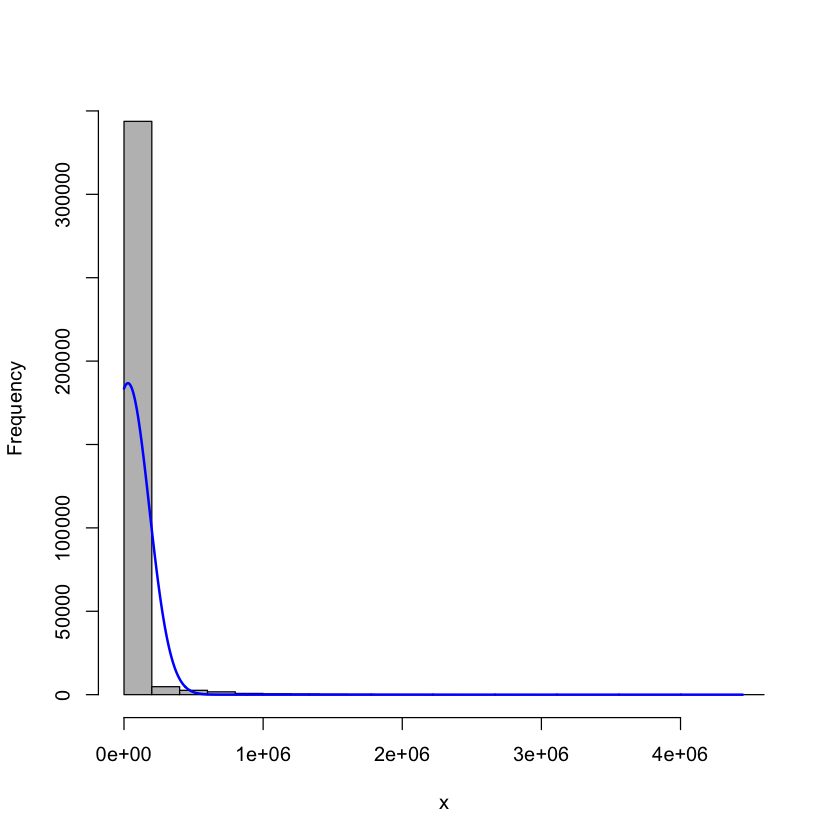

In [18]:
plotNormalHistogram(BorderCrossing$Value)

## That is not normally distributed at all - positively skewed

### Square root

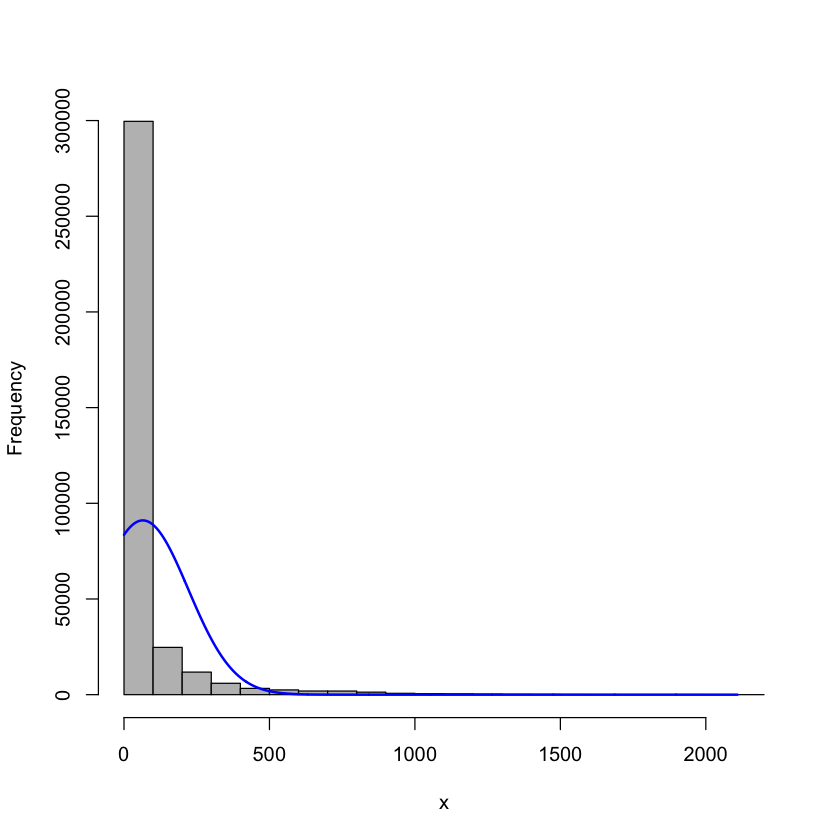

In [20]:
BorderCrossing$ValueSQRT <- sqrt(BorderCrossing$Value)
plotNormalHistogram(BorderCrossing$ValueSQRT)

### Log

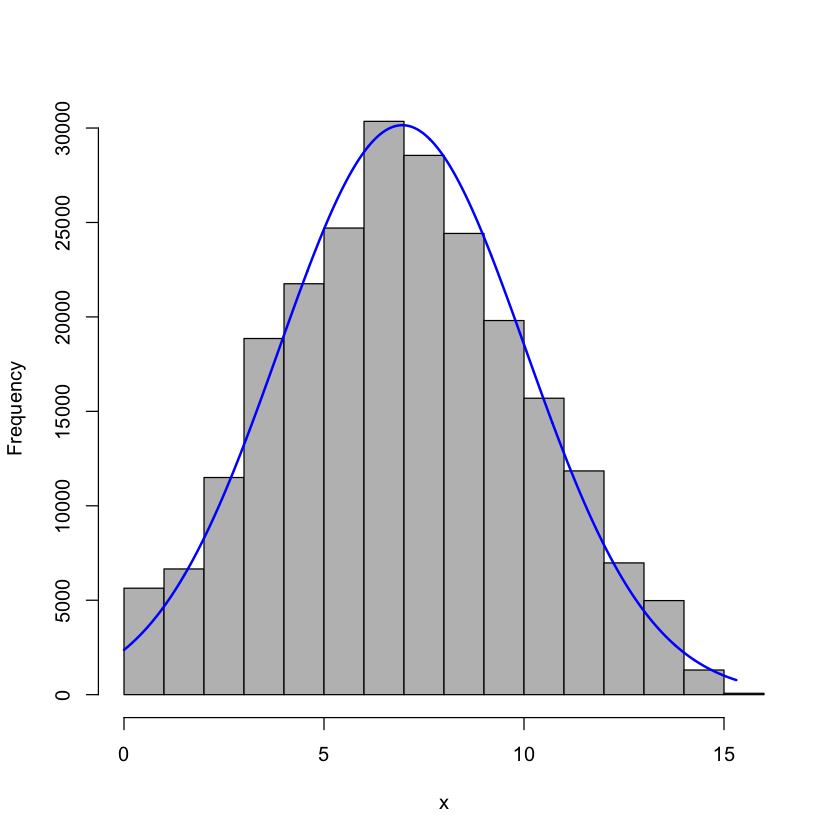

In [21]:
BorderCrossing$ValueLOG <- log(BorderCrossing$Value)
BorderCrossing2 <- NaRV.omit(BorderCrossing)
plotNormalHistogram(BorderCrossing2$ValueLOG)

### Log looks great, go with that

## Bartle 's Test for homogeneity of variance

In [26]:
bartlett.test(ValueLOG ~ Measure, data=BorderCrossing2)
### If it's significant, that's bad, you have violated homogeneity (like we have here)


	Bartlett test of homogeneity of variances

data:  ValueLOG by Measure
Bartlett's K-squared = 21600, df = 11, p-value < 2.2e-16


## Sample size - we have over 200,000 something rows, so good there

In [28]:
dim(BorderCrossing2)

[1] 233119      9

In [29]:
# Run the test, use the Welch's test because we violated homogeneity of variance
ANOVA <- lm(ValueLOG ~ Measure, data=BorderCrossing2)
Anova(ANOVA, Type="II", white.adjust=TRUE)
## It is significant, meaning that the number of people does vary based on their method of travel across the border

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
Measure,11,18104.53,0
Residuals,233107,NA,NA


## Post hocs

In [30]:
pairwise.t.test(BorderCrossing$Value, BorderCrossing$Measure, p.adjust="bonferroni", pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  BorderCrossing$Value and BorderCrossing$Measure 

                            Bus Passengers Buses   Pedestrians
Buses                       < 2e-16        -       -          
Pedestrians                 < 2e-16        < 2e-16 -          
Personal Vehicle Passengers < 2e-16        < 2e-16 < 2e-16    
Personal Vehicles           < 2e-16        < 2e-16 < 2e-16    
Rail Containers Empty       < 2e-16        < 2e-16 < 2e-16    
Rail Containers Full        < 2e-16        < 2e-16 < 2e-16    
Train Passengers            < 2e-16        7.4e-11 < 2e-16    
Trains                      < 2e-16        < 2e-16 < 2e-16    
Truck Containers Empty      < 2e-16        < 2e-16 < 2e-16    
Truck Containers Full       1.3e-13        < 2e-16 < 2e-16    
Trucks                      < 2e-16        < 2e-16 < 2e-16    
                            Personal Vehicle Passengers Personal Vehicles
Buses                       -                          

## Every single group differs from every single other group. That is so not helpful!

### Look at the means

In [31]:
crossingMeans <- BorderCrossing %>% group_by(Measure) %>% summarize(Mean = mean(Value)) %>%
arrange(desc(Mean))

In [32]:
crossingMeans

Measure,Mean
<chr>,<dbl>
Personal Vehicle Passengers,179352.83408
Personal Vehicles,84376.62418
Pedestrians,37116.27784
Trucks,8563.49689
Truck Containers Full,6041.53997
Bus Passengers,4953.43874
Truck Containers Empty,2176.42398
Rail Containers Full,1447.40671
Rail Containers Empty,799.08617


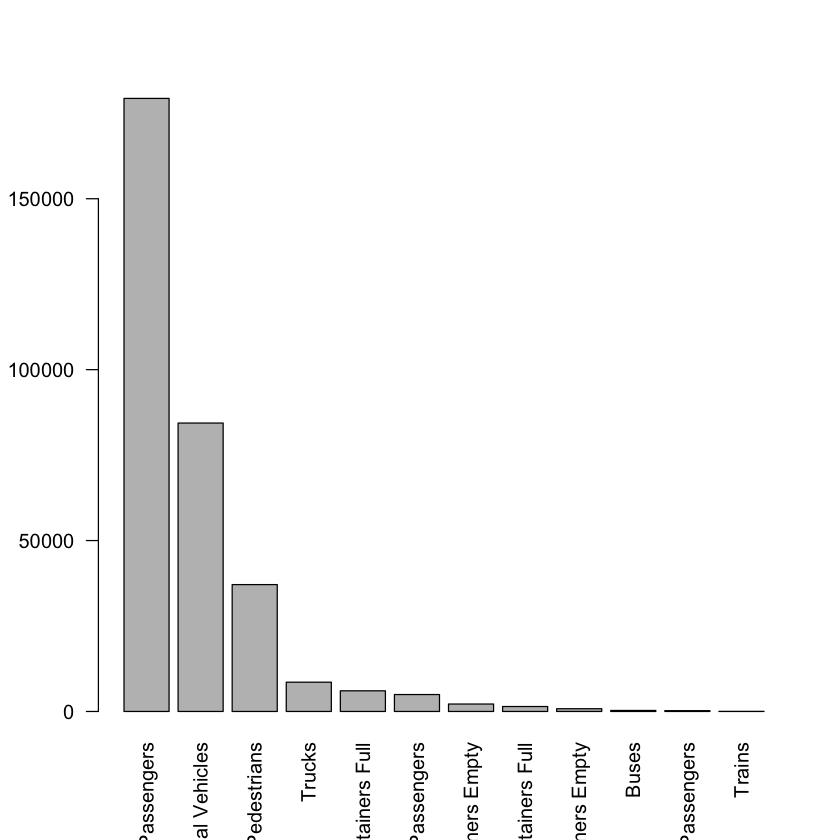

In [48]:
barplot(crossingMeans$Mean, names.arg = crossingMeans$Measure, las = 2)

### The fewest people come by trains, the most come by car. This needs more wrangling to get the best picture of all, though!